# US Salary Data
The data in this analysis was sourced from a survey on <a href="https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html">askmanager.org</a>. It includes 17 questions for individuals to voluntarily respond to. We intend to explore the following questions

* What industry pays the most?

* Are men and women paid differently?

* Do men and women choose different jobs?

* How does race impact income?

* How does state of residence impact income?

## Table of Contents
<ol>
        <li><a href="#Cleaning_the_Data">Cleaning the Data</a></li>
        <li><a href="#What_Industry_Pays_the_Most">What Industry Pays the Most?</a></li>
        <li><a href="#Are_Men_and_Women_Paid_Differently">Are Men and Women Paid Differently?</a></li>
        <li><a href="#Do_Men_and_Women_Choose_Different_Jobs">Do Men and Women Choose Different Jobs?</a></li>
        <li><a href="#race_salary">How does an individuals race impact their income?</a></li>
        <li><a href="#state">How does an individuals state of residence impact their income?</a></li>
</ol>


In [805]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

<hr>

<div id="Cleaning_the_Data">
    <h2>Cleaing the Data</h2>
</div>

In [806]:
#load csv data set, changing column names, and print the first 5 rows
data = pd.read_csv("SalarySurvey.csv")
new_header = ('Age','Industry','JobTitle','JobContext','Salary','AdditionalCompensation','Currency','OtherCurrency','SalaryContext',
              'Country','State','City','OverallExperience','FieldExperience','Education','Gender','Race')
data.columns = new_header
data.head()

,Age,Industry,JobTitle,JobContext,Salary,AdditionalCompensation,Currency,OtherCurrency,SalaryContext,Country,State,City,OverallExperience,FieldExperience,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


The columns Job Context, SalaryContext, and Overall Experience will be unnecessary to our analysis so we will drop them now.

In [807]:
data.drop(columns = ['JobContext','SalaryContext','OverallExperience'], inplace=True)

To make future analysis easy we will change any empty row in 'AdditionalCompensation' to float 0.

In [808]:
data['AdditionalCompensation'].replace(np.nan,float(0.0),inplace=True)

In [809]:
#Display shape of data
data.shape

(27886, 14)

In [810]:
#Printing the count of empty rows in each column of the data
data.isna().sum()

Age                           0
Industry                     71
JobTitle                      0
Salary                        0
AdditionalCompensation        0
Currency                      0
OtherCurrency             27693
Country                       0
State                      4962
City                         75
FieldExperience               0
Education                   211
Gender                      165
Race                        166
dtype: int64

### Filtering Country Data

We want to keep the scope of this analysis restricted to the United States so we will remove any row which was not input by someone from the US. This task is not as straight forward as it may first seem. The free form nature of the survey means there is no consistent entry format for any respondents country. We will tackle this problem in a few steps:

<ol type="1">
  <li>Remove punctuation and spacing and transform all characters to lower case.</li>
  <li>Create a list of the most common ways someone can enter 'US' accounting for typos.</li>
  <li>Loop through the DataFrame and create a new column'FCountry' where anything in our list is 'USA' and everything else is 'Other'.</li>
  <li>Take advantage of the existence of the 'state', 'city', and 'currency' columns to filter down to the rows most likely to have a US respondent.</li>
  <li>Remove all data marked 'Other' in 'FCountry'</li>  
</ol>

In [811]:
#Removing comma, period, and space as well as making data lower case
data['Country'] = data['Country'].str.replace('.','')
data['Country'] = data['Country'].str.replace(' ','')
data['Country'] = data['Country'].str.replace(',','')
data['Country'] = data['Country'].str.lower()

#List of most common possible entries for USA
US_Names = ['usa','us','unitedstates','unitedstatesofamerica','us>','isa','unitedstate','america','theunitedstates','unitedstateofamerica','unitedstated',
            'unitedstatws','unitesstates','unitedsates','unitedstatesofamerican','uniitedstates','unitedsatesofamerica',
            'untedstates','unitedstatesp','unitedstattes','unitedstatea','unitedstatees','uniyedstates','uniyesstates', 'unitedstatesofamericas', 'ua',
            'usofa','unitedstatus','uxz','uniteedstates','unitedstares','unitestates','unitedstatew','unitedstatues','untiedstates','usab','unitiedstates',
            'unitedsttes','uniterstatez','unitedstateds','usat','unitefstated','usaa','california','usd','unitedstatss','unitedstatesisamerica']

#Creating 'FCountry' column
Country_Formatted = [] #Empty list for Country Formats
for row in data['Country']: #Loop through each row of data['Country']
    if row in US_Names: 
        Country_Formatted.append('USA')
    else:
        Country_Formatted.append('Other')
data['FCountry'] = Country_Formatted #Create the new column 'FCountry' equal to Country_Formatted list
data['FCountry'].loc[data['FCountry'] == 'Other'].count()

/var/folders/d7/x28k7yq55bngqp052j18rgcm0000gn/T/ipykernel_1876/641823869.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Country'] = data['Country'].str.replace('.','')


4832

We see that there are 4832 rows which contain 'Other' in the 'FCountry' column. At this point simply removing any of these rows is highly likely to remove rows that meant to have US. Unfortunately it would be infeasible to check each row. However, of these countries marked 'Other' any row that does not have 'USD' as the currency and has no state entered is unlikely to have been entered by a US worker. This allows us to greatly reduce the subset of rows we need to look at and catch any other useful data.

In [812]:
#Creating a new dataframe which contains those rows with a State entered and 'Currency'==USA and 'FCountry'=='Other'
CountryData = data.loc[data['FCountry'] == 'Other'].loc[data['Currency'] == 'USD'].loc[data['State'].isnull() == False]
CountryData[['Country','City']]

,Country,City
1971,contracts,DC
2249,wedon'tgetraiseswegetquarterlybonusesbuttheype...,Mashpee
3019,worldwide(basedinusbutshorttermtripsaroudnthew...,"Washington, DC"
3586,unitedstates(iworkfromhomeandmyclientsareallov...,Tampa
4739,iamlocatedincanadabutiworkforacompanyintheus,"Company is in Glendale, California I am in Bar..."
7361,currentlyfinance,Portland
8544,virginia,Richmond
9059,uss,Hancock
9701,hartford,Hartford
10053,is,Will County


Looking at this list we see that there are a number of entries which contain data from US employees.

In [813]:
index_list = [1971,2249,3019,3586,7361,8544,9059,9701,10053,
              10509,11529,11545,11645,12504,12925,13341,15015,17616,17637,19696,
              19747,21249,22406,22659,22822,24017,26613] #List of indexes contianing US workers

for item in index_list: #Loops through index_list and changes those rows 'FCountry' to 'USA'
    data.at[item, 'FCountry'] = 'USA'

At this point we can confidently remove all rows containg 'Other' in the 'FCountry' column. We will also remove the 'Currency' and 'FCountry' columns since they no longer contain useful data.

In [814]:
data = data[data['FCountry'] == 'USA'] #Removing all rows not contianing 'USA' in 'FCountry'
data.drop(columns = ['Currency','FCountry','Country','OtherCurrency'], inplace = True) #Removing 'Currency' and 'FCountry'
data.head() #Print first five rows of the dataframe

,Age,Industry,JobTitle,Salary,AdditionalCompensation,State,City,FieldExperience,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,Massachusetts,Boston,5-7 years,Master's degree,Woman,White
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",0.0,Tennessee,Chattanooga,2 - 4 years,College degree,Woman,White
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,Wisconsin,Milwaukee,5-7 years,College degree,Woman,White
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,South Carolina,Greenville,5-7 years,College degree,Woman,White
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",0.0,New Hampshire,Hanover,2 - 4 years,Master's degree,Man,White


### Updating State Data

For future analysis we would like to have as much usuable state data as possible. Unfortunately there are quite a few empty state entries in our
data. We can take advantage of the 'city' column to fill in as many states as possible.

In [815]:
#Print the number of empty state columns
data['State'].isnull().sum()

169

In [816]:
#Print all rows in the 'state' and 'city' columns with an empty 'state' row
data[['State','City']].loc[data['State'].isna() == True].head()

,State,City
10,NaN,"Boston, MA"
21,NaN,Atlanta
71,NaN,Colorado Springs
132,NaN,Philadelphia
133,NaN,Indianapolis


After going through the cities entered I was able to match each city with its respective state.

In [817]:
#The following dictionary contains as keys the index of each row, and the value is the state for that row
statedict = {10:'Massachusetts', 21:'Georgia', 71:'Colorado', 132:'Pennsylvania', 133:'Indiana', 149:'New York', 171:'District of Columbia', 
             191:'Oregon', 203:'Alabama', 217:'New York', 224:'District of Columbia', 274:'Pennsylvania', 278:'Nebraska', 352:'Florida', 
             387:'California', 420:'Georgia', 453:'New York', 457:'District of Columbia', 467:'Pennsylvania', 475:'California', 489:'Michigan',
             544:'New York', 550:'New York', 601:'New York', 604:'California', 713:'Arizona', 739:'California', 802:'District of Columbia',
             809:'California', 854:'Georgia', 866:'North Carolina', 869:'New Jersey', 890:'Illinois', 977:'New York', 990:'Colorado',
             1031:'Washington', 1033:'Minnesota', 1081:'Oregon', 1085:'District of Columbia', 1110:'District of Columbia', 1165:'District of Columbia',
             1171:'Pennsylvania', 1207:'Washington', 1236:'California', 1266:'New York', 1340:'District of Columbia', 1369:'New Jersey', 
             1372:'Illinois', 1452:'New York', 1459:'Virginia', 1514:'California', 1528:'Massachusetts', 1550:'Massachusetts', 1559:'Illinois',
             1619:'Pennsylvania', 1672:'New York', 1685:'Tennessee', 1688:'Massachusetts', 1707:'Texas', 1710:'District of Columbia', 1735:'Florida', 
             1781:'California', 1794:'Georgia', 1796:'Washington', 1822:'Michigan', 1859:'District of Columbia', 1916:'California', 1930:'Indiana', 
             1960:'New York', 1966:'Michigan', 1982:'Wisconsin', 2011:'California', 2047:'District of Columbia', 2337:'Ohio', 2754:'Minnesota', 
             2984:'California', 3042:'Wyoming', 3045:'Minnesota', 3960:'Minnesota', 4564:'District of Columbia', 4690:'Louisiana', 5074:'Minnesota', 
             5366:'Texas', 6769:'Illinois', 6815:'North Carolina', 7568:'Pennsylvania', 8058:'New York', 8096:'District of Columbia', 
             8207:'Massachusetts', 8769:'District of Columbia', 8802:'North Carolina', 9212:'Oregon', 9350:'Pennsylvania', 9740:'District of Columbia',
             9972:'District of Columbia', 10016:'Pennsylvania', 11313:'Washington', 11994:'Illinois', 12310:'Georgia', 12365:'Georgia', 12743:'Florida', 
             13450:'New York', 13670:'California', 14061:'Wisconsin', 14554:'Oregon',14593:'New York', 14828:'Minnesota', 14861:'Connecticut', 
             15112:'Massachusetts', 15288:'Virginia', 15779:'New York', 15845:'California', 16920:'New York', 17175:'Illinois', 17945:'Pennsylvania', 
             18677:'Minnesota', 19298:'Massachusetts', 19487:'Michigan', 21476:'Texas', 21981:'Vermont', 22365:'California', 23396:'Texas', 
             23530:'New York', 24127:'North Carolina', 24357:'Massachusetts', 25076:'Colorado', 25120:'New York', 25599:'Massachusetts',
             26119:'California', 26494:'Pennsylvania'}

#loop through the dictionary and replace the state value for each row with the proper state
for index in statedict:
    data.at[index,'State'] = statedict[index]

In [818]:
states = []
for row in data['State']:
    state = str(row).split(',')
    states.append(state)
    
data['State'] = states

### Reformatting Race Data

No analysis of salary data would be complete without analyzing the effect of race and salary. The entry form for the survey allowed respondents to enter multiple races with which they identify. This is great and will allow some very interesting analysis, however the way the dataframe stores this information is not the easiest to work with. I will change this current string entry to a slightly friendly format so we can use commas as a deliminator.

In [819]:
#List of each race that could have been entered. The values in the dictionary will be the list that will contain the new column data
races = ['Asian', 'African American', 'Hispanic', 'Middle Eastern', 'Native American', 'White']

race = []
#Loop through each row of the data['Race'] dataframe
for row in data['Race']:
    indvrace = ''
    #Loop through each item in the list
    for item in races:
        #Check to see if the item is contained in the row append item to the string if in the row, no if not
        if item in str(row):
            indvrace = indvrace + item + ','
    race.append(indvrace[:-1].split(','))

data['Race'] = race

In [820]:
data.head()

,Age,Industry,JobTitle,Salary,AdditionalCompensation,State,City,FieldExperience,Education,Gender,Race
0,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",0.0,[Massachusetts],Boston,5-7 years,Master's degree,Woman,[White]
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",0.0,[Tennessee],Chattanooga,2 - 4 years,College degree,Woman,[White]
3,25-34,Nonprofits,Program Manager,"62,000",3000.0,[Wisconsin],Milwaukee,5-7 years,College degree,Woman,[White]
4,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",7000.0,[South Carolina],Greenville,5-7 years,College degree,Woman,[White]
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,"62,000",0.0,[New Hampshire],Hanover,2 - 4 years,Master's degree,Man,[White]


### Filtering TotalComp outliers

Many respondents entered an additional compensation as well as Salary we would like to do our analysis on the total compensation of US individuals. So we will create a new column, one will contain the sum of the 'Salary' and 'AdditionalCompensation' columns and naming it 'TotalComp'. We will then remove the 'AdditionalCompensation' column.

In [821]:
data['Salary'] = data['Salary'].str.replace(',','') #Removing commas from Salary
data['Salary'] = data['Salary'].astype('float') #Changing the type of Salary to float
data['TotalComp'] = data['Salary'] + data['AdditionalCompensation'] #Creating the TotalComp column
data.drop(columns = ['AdditionalCompensation'], inplace = True) #Removing the AdditionalCompensation column
data.head() #Printing the first five rows of our new dataframe 

,Age,Industry,JobTitle,Salary,State,City,FieldExperience,Education,Gender,Race,TotalComp
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,[Massachusetts],Boston,5-7 years,Master's degree,Woman,[White],55000.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,[Tennessee],Chattanooga,2 - 4 years,College degree,Woman,[White],34000.0
3,25-34,Nonprofits,Program Manager,62000.0,[Wisconsin],Milwaukee,5-7 years,College degree,Woman,[White],65000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,[South Carolina],Greenville,5-7 years,College degree,Woman,[White],67000.0
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.0,[New Hampshire],Hanover,2 - 4 years,Master's degree,Man,[White],62000.0


Normally the task of removing outliers is completed by simply removing any value which is more than 3 standard deviations from the mean. This removes only the largest and smallest 1% of data entered. However, the standard deviation of this data set is quite large and all data is with in 3 standard deviations below the mean. So we will remove any data greater than 3 standard deviations of the mean, and inspect any data 1 standard deviation less than the mean.

In [822]:
#Creating variables for mean, standard deviation, lower bound, upperbound
CompMean = data['TotalComp'].mean()
CompStd = data['TotalComp'].std()
Complow = CompMean - CompStd
Comphigh = CompMean + 3*CompStd
#Removing data higher than Comphigh
data = data[data['TotalComp'] <= Comphigh]

In [823]:
#Displaying all rows with total compensation more than one standard deviation below the mean
data[data['TotalComp'] < Complow]

,Age,Industry,JobTitle,Salary,State,City,FieldExperience,Education,Gender,Race,TotalComp
97,55-64,Environmental regulation,Quality Assurance Lead,58.0,[Maryland],Baltimore,8 - 10 years,Master's degree,Woman,[White],58.0
895,45-54,Education (Primary/Secondary),Special Education Teacher,38.0,[Idaho],Pocatello,11 - 20 years,Master's degree,Woman,[White],38.0
968,25-34,Media & Digital,Managing Editor,61.0,[Maryland],Bethesda,5-7 years,College degree,Woman,[White],61.0
1607,25-34,Agriculture or Forestry,Chief Data Scientist,130.0,[New Mexico],Santa Fe,8 - 10 years,PhD,Woman,[White],130.0
3887,35-44,accessibility,freelance captioner,4000.0,[North Carolina],remote,2 - 4 years,Master's degree,Non-binary,[White],4000.0
4081,45-54,Retail,Operations Manager,35.0,[West Virginia],Charleston,5-7 years,Some college,Woman,[White],35.0
4124,35-44,Engineering or Manufacturing,Engineering Supervisor,108.0,[Minnesota],Twin Cities,8 - 10 years,College degree,Woman,[White],5108.0
5211,25-34,Museum (University Affiliated),Assistant Registrar,40.0,[District of Columbia],Washington,2 - 4 years,Master's degree,Woman,[White],40.0
6124,45-54,Public Library,Regional Manager,70.0,[Missouri],St. Louis,11 - 20 years,Master's degree,Woman,[White],70.0
6550,35-44,Education (Primary/Secondary),Manager,155.0,[Massachusetts],Boston,8 - 10 years,Master's degree,Woman,[White],155.0


Observing this data we see that everyone who entered a value 1 standard deviations less than the mean is either 0 or appears to be there in error. There seem to be two common errors, mistakenly writing a multiple of a thousand, or entering monthly/weekly salaries. It would be infeasible and likely introduce additional error to try and guess what each person meant to enter. For this reason I have elected to remove all entries less than 1 standard deviations of the mean.

In [824]:
data = data[data['TotalComp'] >= Complow]

### Filtering Industry Data

The survey had an option to have a free form entry if the respondent wanted to enter other. This is unfriendly to work with and I have elected to replace any row that had a free form entry in 'Industry' with 'Other'.

In [825]:
Industries = ['Accounting, Banking & Finance','Agriculture or Forestry','Art & Design','Business or Consulting','Computing or Tech',
              'Education (Primary/Secondary)','Education (Higher Education)','Engineering or Manufacturing','Entertainment',
              'Government and Public Administration','Health care','Hospitality & Events','Insurance','Law','Law Enforcement & Security',
              'Leisure, Sport & Tourism','Marketing, Advertising & PR','Media & Digital','Nonprofits','Property or Construction',
              'Recruitment or HR','Retail','Sales','Social Work','Transport or Logistics','Utilities and Telecommunications']

Industry_Formatted = [] #Empty list for loop
for row in data['Industry']: #Loop through each row of the dataframe and if row is in the the above list then append it to Industry_Formatted otherwise append other
    if row in Industries:
        Industry_Formatted.append(row)
    else :
        Industry_Formatted.append('Other')
data['Industry'] = Industry_Formatted
data.head()

,Age,Industry,JobTitle,Salary,State,City,FieldExperience,Education,Gender,Race,TotalComp
0,25-34,Education (Higher Education),Research and Instruction Librarian,55000.0,[Massachusetts],Boston,5-7 years,Master's degree,Woman,[White],55000.0
2,25-34,"Accounting, Banking & Finance",Marketing Specialist,34000.0,[Tennessee],Chattanooga,2 - 4 years,College degree,Woman,[White],34000.0
3,25-34,Nonprofits,Program Manager,62000.0,[Wisconsin],Milwaukee,5-7 years,College degree,Woman,[White],65000.0
4,25-34,"Accounting, Banking & Finance",Accounting Manager,60000.0,[South Carolina],Greenville,5-7 years,College degree,Woman,[White],67000.0
5,25-34,Education (Higher Education),Scholarly Publishing Librarian,62000.0,[New Hampshire],Hanover,2 - 4 years,Master's degree,Man,[White],62000.0


<div id="What_Industry_Pays_the_Most">
    <h2>What Industry Pays the Most?</h2>
</div>

In [826]:
IndustryvSalary = data.groupby(['Industry'])['TotalComp'].mean().sort_values()
IndustryvSalary

Industry
Social Work                              58805.055794
Education (Primary/Secondary)            64820.113154
Law Enforcement & Security               65092.250000
Retail                                   68087.195929
Education (Higher Education)             68641.045827
Hospitality & Events                     69986.557143
Nonprofits                               72924.886632
Leisure, Sport & Tourism                 74896.356164
Agriculture or Forestry                  76355.121495
Property or Construction                 78065.790997
Art & Design                             78469.301695
Government and Public Administration     84186.309829
Other                                    86571.060635
Transport or Logistics                   86920.789916
Recruitment or HR                        87046.656566
Media & Digital                          90409.197068
Insurance                                93085.087719
Health care                              94294.503722
Marketing, Advertis

<AxesSubplot: xlabel='TotalComp', ylabel='Industry'>

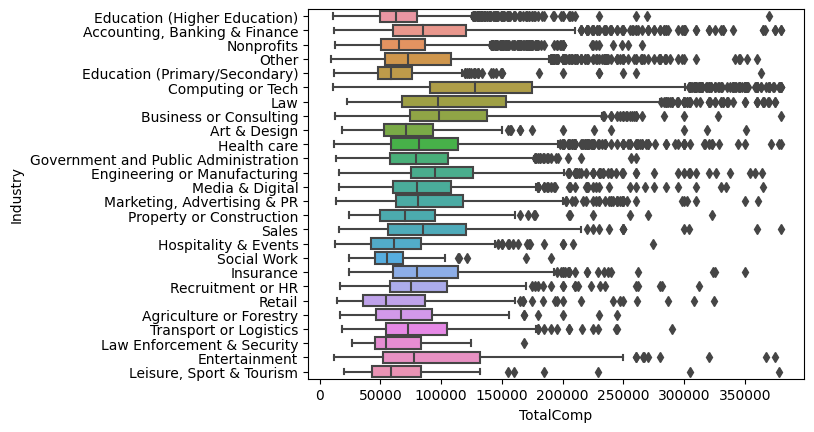

In [827]:
sns.boxplot(x = data['TotalComp'], y = data['Industry'])

We can see from above that the highest average salary is found among those in the Computing or Tech industry and the lowest is in Social Work

<div id="Are_Men_and_Women_Paid_Differently">
    <h2>Are Men and Women Paid Differently?</h2>
</div>

For this question we have null hypothesis of $H_0: \mu_{men} = \mu_{women}$ and $H_a:\mu_{men} \ne \mu_{women}$. To investigate this question we will use a t-test for difference in means with unpooled variances.

In [828]:
Gender = data.groupby(['Gender'])['TotalComp'].describe() #Creating a new dataframe which contains gender data.
Gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Man,4057.0,120904.409662,67660.822847,10700.0,70000.0,105000.0,156500.0,380000.0
Non-binary,586.0,74261.820819,48227.473325,13000.0,43416.0,60000.0,86875.0,350000.0
Other or prefer not to answer,226.0,97886.464602,59334.847849,14850.0,57187.5,86500.0,118000.0,350200.0
Prefer not to answer,1.0,88010.000000,NaN,88010.0,88010.0,88010.0,88010.0,88010.0
Woman,17743.0,90544.663867,50125.064780,9000.0,56915.5,78000.0,110000.0,380000.0


In [829]:
#Calculating some constants
Mmean = Gender['mean']['Man']
Fmean = Gender['mean']['Woman']
Mstd = Gender['std']['Man']
Fstd = Gender['std']['Woman']
Mn = Gender['count']['Man']
Fn = Gender['count']['Woman']

stats.ttest_ind_from_stats(Mmean,Mstd,Mn,Fmean,Fstd,Fn,equal_var = False,alternative = 'greater') #t-test for Mmean>Fmean

Ttest_indResult(statistic=26.939672158529632, pvalue=6.616009230532342e-150)

After carrying out our t-test we find that we have a p-value of $1.06\cdot10^{-149}$ which means we have sufficient evidence to reject our null hypothesis at almost any significance level. Thus we have significant evidence to show that men earn more on average than women

<div id="Do_Men_and_Women_choose_different_jobs">
    <h2>Do Men and Women choose different jobs?</h2>
</div>

For this question we will use a chi-square test to test the null hypothesis that there is no relationship between men and women's choice in industry vs the alternative hypothesis that there is a relationship.

In [830]:
# Remove all other genders other than Men and Women
df = data[data['Gender'] != 'Non-binary'] 
df = df[df['Gender'] != 'Other or prefer not to answer']
df = df[df['Gender'] != 'Prefer not to answer']
# Create a pivot table using our new dataframe
df_pivot = pd.pivot_table(df, values='Age', index='Gender', columns='Industry',
               aggfunc='count')
df_pivot

Industry,"Accounting, Banking & Finance",Agriculture or Forestry,Art & Design,Business or Consulting,Computing or Tech,Education (Higher Education),Education (Primary/Secondary),Engineering or Manufacturing,Entertainment,Government and Public Administration,...,"Marketing, Advertising & PR",Media & Digital,Nonprofits,Other,Property or Construction,Recruitment or HR,Retail,Sales,Social Work,Transport or Logistics
Gender,,,,,,,,,,,,,,,,,,,,,
Man,224,10,42,107,1421,238,64,382,40,181,...,107,112,177,298,55,27,67,59,9,61
Woman,1167,89,234,551,1968,1735,623,973,147,1172,...,772,470,1838,1721,250,359,301,168,214,170


In [831]:
stats.chi2_contingency(df_pivot,correction=True) #Running the chi-square test on our pivot table

(1805.2846795122396,
 0.0,
 25,
 array([[ 258.86637615,   18.42399083,   51.36385321,  122.45440367,
          630.69600917,  367.17711009,  127.85133028,  252.16674312,
           34.80087156,  251.79454128,  289.01472477,   37.22018349,
           82.07050459,  167.49082569,    5.58302752,   13.58536697,
          163.58270642,  108.31073394,  374.99334862,  375.73775229,
           56.76077982,   71.83495413,   68.48513761,   42.24490826,
           41.50050459,   42.98931193],
        [1132.13362385,   80.57600917,  224.63614679,  535.54559633,
         2758.30399083, 1605.82288991,  559.14866972, 1102.83325688,
          152.19912844, 1101.20545872, 1263.98527523,  162.77981651,
          358.92949541,  732.50917431,   24.41697248,   59.41463303,
          715.41729358,  473.68926606, 1640.00665138, 1643.26224771,
          248.23922018,  314.16504587,  299.51486239,  184.75509174,
          181.49949541,  188.01068807]]))

Our chi-square test results in a p-value of zero which means that at any significance level we would reject our null hypothesis and conclude that there is a relationship between Men's and Women's choices in industry.

<div id="race_salary">
    <h2>How does an individuals race impact their income?</h2>
</div>

To view the impact of race on income we will first observe the statistics for individuals that only identify with a single race and those that identify with multiple.

### Single Race Listed vs Income

To explore the data for individuals with a single race entered we will create a new dataframe which only contains those individuals.

In [832]:
Singlerace = data[['Race','TotalComp']] #New dataframe for our analysis

singlerace = [] #Empty list
for row in Singlerace['Race']: #Loop to create a new column which contains Yes if someone entered only a single race and NaN for others
    if len(row[0]) == 0:
        singlerace.append(np.nan)
    elif len(row) == 1:
        singlerace.append('Yes')
    else:
        singlerace.append(np.nan)

Singlerace['Singlerace'] = singlerace #Create the new column in the dataframe
Singlerace.dropna(subset=['Singlerace'], inplace=True) #Drop any empty row

#Remove the Singlerace column
Singlerace = Singlerace[['Race','TotalComp']]

race = [] #Converting the single length list to string
for row in Singlerace['Race']:
    race.append(row[0])
    
Singlerace['Race'] = race
Singlerace.head()

,Race,TotalComp
0,White,55000.0
2,White,34000.0
3,White,65000.0
4,White,67000.0
5,White,62000.0


In [833]:
Singlerace.groupby(['Race'])['TotalComp'].describe().sort_values(by = 'mean') 

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
Native American,35.0,83410.057143,37307.180248,29808.0,49500.0,90000.0,109500.0,155000.0
Hispanic,519.0,90178.256262,49453.419745,9000.0,56000.0,79000.0,112100.0,335000.0
White,18889.0,94303.973424,54136.180922,10700.0,57500.0,80000.0,115000.0,380000.0
African American,583.0,96134.370497,54109.941229,20000.0,60000.0,84000.0,119100.0,367500.0
Asian,1079.0,119419.119555,64114.524188,24000.0,71250.0,106000.0,150000.0,370000.0
Middle Eastern,50.0,119760.800000,69709.478289,28800.0,68625.0,103250.0,164250.0,345000.0


<AxesSubplot: xlabel='TotalComp', ylabel='Race'>

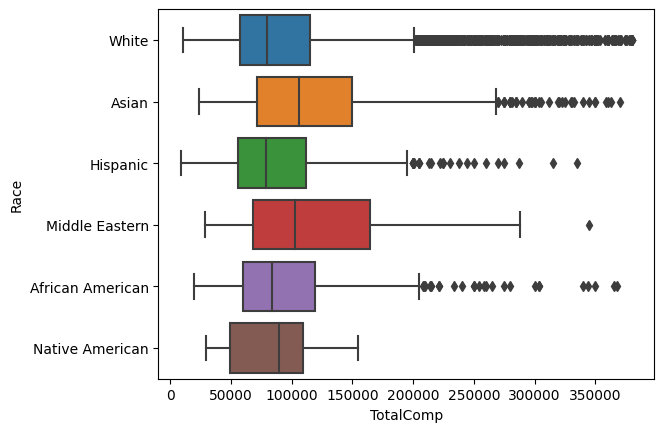

In [834]:
sns.boxplot(x = Singlerace['TotalComp'], y = Singlerace['Race'])

Viewing the boxplots and key statistics for the race vs salary data for individuals who entered only a single rae we see a couple interesting trends. Immediately we see that on average Middle Eastern respondents earned the most and Native American respodents earned the least. By far the most respondents identified as white (over 18,000!) so we likely have quite a good estimate of the average salary for that group. On average white respondents make about as much as both African American respondents and Hispanic respondents. Middle Eastern and Asian respondents make quite a bit more than all three other races. Native Americans on average have quite a large gap to the average hispanic income. 

The data on Native American and Middle Eastern salaries aren't the most reliable since they both have fewer than 50 respondents.

### Multiple Races Listed vs Income

We will use the same process for individuals that entered multiple races.

In [835]:
Multipleraces = data[['Race','TotalComp']]

multipleraces = []
for row in Multipleraces['Race']:
    if len(row[0]) == 0:
        multipleraces.append(np.nan)
    elif len(row) == 1:
        multipleraces.append(np.nan)
    else:
        multipleraces.append('Yes')

Multipleraces['Singlerace'] = multipleraces

Multipleraces.dropna(subset=['Singlerace'], inplace=True)

races = []
for row in Multipleraces['Race']:
    indvraces = ''
    for item in row:
        indvraces = indvraces + item + ','
    races.append(indvraces[:-1])
    
Multipleraces['Race'] = races

In [836]:
#We will remove all groups that contain fewer than 10 entries.
Describe = Multipleraces.groupby(['Race'])['TotalComp'].describe().sort_values(by = 'count')
Describe = Describe[Describe['count'] > 9]
Describe.sort_values(by = 'mean')

,count,mean,std,min,25%,50%,75%,max
Race,,,,,,,,
"African American,Hispanic,White",10.0,75439.000000,44671.563525,35000.0,49307.5,52750.0,107000.0,153000.0
"African American,Hispanic",24.0,76771.041667,39039.519791,29280.0,47575.0,63600.0,104250.0,185000.0
"Hispanic,Native American",10.0,78180.000000,30135.280173,38000.0,60475.0,72000.0,91500.0,141000.0
"African American,White",109.0,84556.366972,49285.252947,15000.0,54000.0,73490.0,100000.0,360000.0
"Hispanic,White",356.0,87048.985955,45275.653027,23150.0,56187.5,75000.0,105425.0,364000.0
"Asian,Hispanic",14.0,92839.285714,38843.324437,40000.0,66070.0,91000.0,119300.0,165000.0
"Native American,White",51.0,95429.039216,47736.242581,30500.0,52300.0,85000.0,138376.0,188600.0
"Asian,Hispanic,White",13.0,97992.923077,81123.422975,26325.0,58700.0,73000.0,92000.0,340000.0
"Asian,White",301.0,98777.109635,58886.276740,15000.0,58000.0,85000.0,124800.0,370000.0


Due to the relatively small amount of data we have to be careful with any observations we make. To avoid make conclusion from excedingly small sample sizes I have elected to only view samples with more than 9 values. However, among the distinct racial identifications with more than 9 entries we can see that again indiviudals who identify with either being Middle Eastern or Asian make more on average than other individuals and those that identify with African American or Hispanic make less on average than other groups. 

<div id="state">
    <h2>How does an individuals state of residence impact their income?</h2>
</div>

To explore our data based on the state of residence for individuals we will use a similar strategy as we did with race. Namely we will only focus our attention on those who entered one state of residence.

In [837]:
Singlestate = data[['State','TotalComp']] #New dataframe for our analysis

singlestate = [] #Empty list
for row in Singlestate['State']: #Loop to create a new column which contains Yes if someone entered only a single state is entered and NaN for others
    if len(row[0]) == 0:
        singlestate.append(np.nan)
    elif len(row) == 1:
        singlestate.append('Yes')
    else:
        singlestate.append(np.nan)

Singlestate['Singlestate'] = singlestate #Create the new column in the dataframe
Singlestate.dropna(subset=['Singlestate'], inplace=True) #Drop any empty row

#Remove the Singlestate column
Singlestate = Singlestate[['State','TotalComp']]

state = [] #Converting the single length list to string
for row in Singlestate['State']:
    state.append(row[0])
    
Singlestate['State'] = state
Singlestate = Singlestate[Singlestate['State'] != 'nan']

Singlestate.groupby(['State'])['TotalComp'].describe().sort_values(by = 'mean')

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Wyoming,25.0,60136.920000,25773.790039,31408.0,45000.00,50128.0,78000.00,143000.0
Montana,64.0,63200.656250,33925.082247,19400.0,37630.00,47500.0,85000.00,182000.0
Mississippi,50.0,63767.800000,29393.890742,28000.0,37400.00,54000.0,85000.00,135000.0
Hawaii,28.0,65074.857143,25855.591572,12000.0,53350.00,65350.0,77187.50,142000.0
South Dakota,25.0,66928.360000,33183.638120,29000.0,45750.00,60350.0,78000.00,150000.0
West Virginia,40.0,67334.900000,34852.392582,27000.0,44500.00,53044.0,82125.00,185000.0
Maine,125.0,67398.184000,29664.653572,22000.0,44000.00,60000.0,85000.00,173000.0
North Dakota,34.0,68072.117647,32844.607321,24000.0,46315.00,59500.0,80930.00,162000.0
Kentucky,189.0,68820.343915,35846.935232,11500.0,45000.00,60500.0,80600.00,221000.0
